# Spike Rastar Plot

Some explanation. Some math $mc^2$

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import seaborn as sns

c:\Users\moham\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Load the data

In [3]:
dataset = xr.load_dataset("data/steinmetz_2017-11-01_Forssmann.nc")

### Inpect some variables

In [4]:
dataset.wheel

<xarray.DataArray 'wheel' (trial: 359, time: 250)>
array([[  0,  -1,   0, ...,   0,   1,   1],
       [ -1,   0,   0, ..., -11, -11, -11],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,  -8,  -9,  -7],
       [  4,   2,   1, ...,  -3,  -3,  -5],
       [ -6,  -6,  -6, ..., -12, -12, -11]], dtype=int8)
Coordinates:
  * trial    (trial) int32 1 2 3 4 5 6 7 8 9 ... 352 353 354 355 356 357 358 359
  * time     (time) float64 0.01 0.02 0.03 0.04 0.05 ... 2.46 2.47 2.48 2.49 2.5

In [5]:
dataset.response_type

<xarray.DataArray 'response_type' (trial: 359)>
array([-1., -1., -1., -1., -1.,  1., -1.,  0., -1., -1.,  1.,  0.,  1.,
        1.,  0., -1.,  1.,  0., -1., -1.,  0.,  0., -1.,  1.,  0., -1.,
       -1., -1., -1., -1.,  1., -1., -1.,  0.,  0.,  1.,  1., -1., -1.,
        0.,  0., -1.,  0.,  0.,  0., -1.,  1., -1.,  0.,  0.,  0.,  0.,
        0., -1., -1.,  1., -1.,  0.,  1.,  1.,  0.,  1., -1., -1.,  0.,
       -1.,  1., -1.,  0.,  0.,  1.,  1.,  0.,  1.,  0., -1.,  0.,  1.,
       -1.,  1., -1.,  0.,  0.,  0.,  0.,  0.,  0., -1., -1., -1.,  1.,
        0., -1.,  1.,  1., -1., -1.,  1.,  1.,  0.,  0., -1.,  0.,  0.,
       -1.,  0.,  0.,  0.,  0., -1.,  1.,  0.,  1.,  1.,  0., -1., -1.,
       -1.,  0.,  0.,  0.,  0.,  0.,  1., -1., -1.,  1., -1., -1.,  1.,
        0., -1., -1.,  0.,  0.,  1.,  0.,  1., -1., -1., -1.,  0.,  0.,
        1.,  0.,  1.,  1.,  1.,  0.,  0., -1.,  0.,  0.,  1.,  0.,  0.,
       -1.,  0., -1.,  0.,  0., -1.,  1.,  1.,  0., -1.,  0., -1.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,
        0.,  0.,  1., -1.,  0.,  0., -1.,  0.,  0.,  0.,  1.,  0., -1.,
        0.,  0.,  1.,  0., -1.,  1.,  0.,  1.,  0.,  0., -1.,  0., -1.,
        0., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -1.,
        0., -1.,  0.,  0., -1.,  1.,  0.,  1.,  0., -1.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
        0.,  0., nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan])
Coordinates:
  * trial    (trial) int32 1 2 3 4 5 6 7 8 9 ... 352 353 354 355 356 357 358 359

## Create a dataframe of spike data

In [6]:
spike_data = dataset.spike_time.to_dataframe()
spike_data['spike_cell'] = dataset['spike_cell']
spike_data['spike_trial'] = dataset['spike_trial']
spike_data

,spike_time,spike_cell,spike_trial
spike_id,,,
1,1.144019,1,1
2,1.146752,1,1
3,1.149352,1,1
4,1.154485,1,1
5,1.161752,1,1
...,...,...,...
3485973,1.938831,1769,358
3485974,2.197265,1769,358
3485975,0.033812,1769,359


Collect the spike data of all cells into a single list.

In [7]:
import numpy as np
ids = np.arange(1, spike_data['spike_cell'].max()+1)
cells = []
for cell_idx in ids:
    cell_x = spike_data['spike_time'][(spike_data['spike_cell'] == cell_idx) & (spike_data['spike_trial'] == 1)]
    cells.append(cell_x)

## Plot spike events of a single trial for all cells

Text(0, 0.5, 'Cell ID')

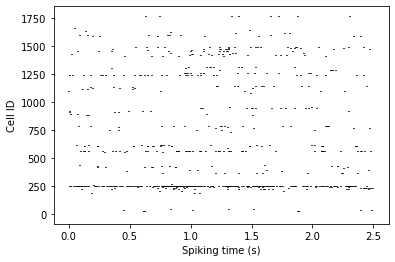

In [8]:
plt.eventplot(cells, linelengths=.5, colors="k");
plt.xlabel("Spiking time (s)")
plt.ylabel("Cell ID")

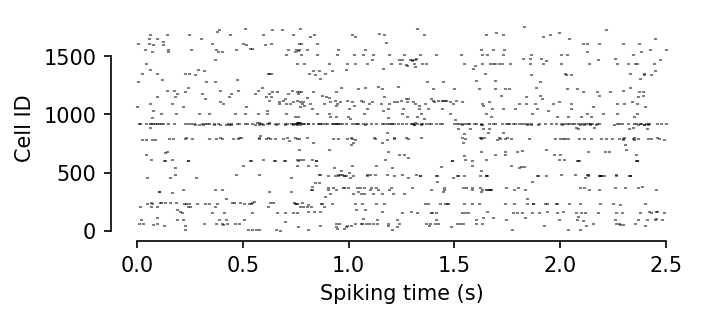

In [18]:
plt.figure(figsize=(5, 2), dpi=150)
plt.eventplot(cells, linelengths=.8, colors="k");
plt.xlabel("Spiking time (s)")
plt.ylabel("Cell ID")
sns.despine(trim=True)